# **Pre-requisite Installation**

In [106]:
pip install -U textblob

In [107]:
!pip install wordcloud

In [108]:
!pip install emoji==2.2.0

In [109]:
pip install seaborn

**Import Library**

In [207]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import emoji
from collections import Counter
from matplotlib import rcParams
import os
import warnings
from warnings import filterwarnings
from sqlalchemy import create_engine
import seaborn as sns
import matplotlib.ticker as ticker
import plotly.express as px
import string
from matplotlib.ticker import FuncFormatter

# **Fetch Data**

**Mount Drive**

In [111]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Read Data**


In [112]:
# The 'on_bad_lines="skip"' parameter is used to ignore rows in the dataset that are malformed or do not conform to the expected structure, preventing errors during the file read operation.
comment_df = pd.read_csv('/content/drive/My Drive/portfolio_dataset/project_1/UScomments.csv', on_bad_lines='skip')

# **Contextual Understanding and Processing**

**Data Interpretation**

In [113]:
# Prints the dimensions of the DataFrame 'comment_df' as a tuple (number of rows, number of columns)
print(comment_df.shape)

(691400, 4)


In [114]:
# Returns the first 5 rows of the DataFrame 'comment_df' by default, allowing a quick preview of the dataset's structure and contents.
comment_df.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


**Handling Missing Values**

In [115]:
# Returns a DataFrame of the same shape as 'comment_df', where each element is True if the corresponding value is NaN (missing), and False otherwise.
comment_df.isnull()

,video_id,comment_text,likes,replies
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
691395,False,False,False,False
691396,False,False,False,False
691397,False,False,False,False
691398,False,False,False,False


In [116]:
# Calculates the total number of missing (NaN) values in each column of the DataFrame 'comment_df' and returns it as a Series.
comment_df.isnull().sum()

,0
video_id,0
comment_text,26
likes,0
replies,0


In [117]:
# Removes all rows with missing values (NaN) from 'comment_df' and updates the DataFrame in place without creating a new one.
comment_df.dropna(inplace=True)

In [118]:
comment_df.isnull().sum()

,0
video_id,0
comment_text,0
likes,0
replies,0


# **Sentiment Analysis**

In this analysis, we will perform sentiment analysis on the **`comment_text`** feature using the **TextBlob** library. Sentiment will be measured using **polarity**, which has a range between -1 and 1:

- **Closer to -1**: Indicates a negative sentiment.
- **Closer to 0**: Indicates a neutral sentiment.
- **Closer to 1**: Indicates a positive sentiment.

This method helps us understand the emotional tone of the text in a simple and interpretable way.


In [119]:
comment_df.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


What is TextBlob?
TextBlob is a Python library for processing textual data. It provides a simple API for performing common Natural Language Processing (NLP) tasks, such as:

1. Part-of-Speech Tagging
Identifies the grammatical category of each word in a sentence (e.g., noun, verb, adjective).
```
blob = TextBlob("TextBlob is amazing!")
print(blob.tags)  # [('TextBlob', 'NNP'), ('is', 'VBZ'), ('amazing', 'JJ')]
```
2. Sentiment Analysis
Evaluates the text for its polarity (negative to positive scale) and subjectivity (objective to subjective scale).
```
print(blob.sentiment)  # Sentiment(polarity=0.75, subjectivity=0.9)
```
3. Text Translation and Language Detection
Translates text into different languages and detects the source language.
Note: Requires an internet connection and may need the googletrans library.
```
print(blob.translate(to='es'))  # "TextBlob es asombroso!"
```
4. Noun Phrase Extraction
Extracts noun phrases from the text.
```
print(blob.noun_phrases)  # ['textblob']
```
5. Tokenization
Splits text into words or sentences.
```
print(blob.words)  # ['TextBlob', 'is', 'amazing']
print(blob.sentences)  # [Sentence("TextBlob is amazing!")]
```
6. Spelling Correction
Corrects misspelled words.
```
blob = TextBlob("I havv goood speling!")
print(blob.correct())  # "I have good spelling!"
```
7. Word Inflection and Lemmatization
Changes word forms or extracts root forms.
```
word = TextBlob("runs")
print(word.words.singularize())  # ['run']
```
Why Use TextBlob?
- Ease of Use: Its simple API makes it ideal for beginners.
- Built-in Sentiment Analysis: Quick polarity and subjectivity checks.
- Integration: Works well alongside libraries like pandas for data analysis.

While TextBlob is great for small-to-medium-scale projects, for advanced use cases, you might consider libraries like spaCy or NLTK.

In [120]:
# Analyzes the sentiment of the given text using TextBlob and returns a Sentiment object with polarity and subjectivity.
# Polarity ranges from -1 (negative) to 1 (positive), while subjectivity ranges from 0 (objective) to 1 (subjective).
TextBlob("Logan Paul it's yo big day ‼️‼️‼️").sentiment

Sentiment(polarity=0.0, subjectivity=0.1)

In [121]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️").sentiment.polarity

0.0

In [122]:
# Creating a sample DataFrame from the first 1000 rows of comment_df for testing or analysis purposes.
sample_comment_df = comment_df[0:1000]

In [123]:
# Initialize an empty list to store polarity scores of the comments
polarity = []

# Iterate through each comment in the 'comment_text' column of the sample_comment_df DataFrame
for cmt in sample_comment_df['comment_text']:
    try:
        # Calculate the polarity (sentiment score) of the comment using TextBlob
        # Polarity ranges from -1 (negative sentiment) to 1 (positive sentiment)
        polarity.append(TextBlob(cmt).sentiment.polarity)
    except:
        # If there's an exception (e.g., invalid data), append 0 as a default polarity
        polarity.append(0)

In [124]:
# Adding the calculated polarity scores as a new column to the sample_comment_df DataFrame
sample_comment_df['polarity'] = polarity

In [125]:
sample_comment_df.head()

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


# **Wordcloud Analysis**

Explanation:
- sample_comment_df['polarity'] == 1 generates a Boolean Series where each value is True if the polarity of the corresponding comment is 1 (indicating a strongly positive sentiment) and False otherwise.
- This Boolean Series (positive_comment) can be used to filter or analyze comments with the highest positive sentiment

In [126]:
# Creating a boolean Series to identify comments with the maximum polarity score (positive sentiment)
positive_comment = sample_comment_df['polarity'] == 1

Explanation:
- sample_comment_df[positive_comment] filters the sample_comment_df DataFrame to include only the rows where positive_comment is True.
- This results in positive_comment_df, a subset of the original DataFrame containing only the comments with the highest positive sentiment (polarity = 1).

In [127]:
positive_comment_df = sample_comment_df[positive_comment]

In [128]:
sample_comment_df[positive_comment].head()

,video_id,comment_text,likes,replies,polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0


Explanation:
- sample_comment_df['polarity'] == -1 generates a Boolean Series where each value is False if the polarity of the corresponding comment is -1 (indicating a strongly negative sentiment) and True otherwise.
- This Boolean Series (negative_comment) can be used to filter or analyze comments with the highest negative sentiment

In [129]:
negative_comment = sample_comment_df['polarity'] == -1

Explanation:
- sample_comment_df[negative_comment] filters the sample_comment_df DataFrame to include only the rows where negative_comment is False.
- This results in negative_comment_df, a subset of the original DataFrame containing only the comments with the highest negative sentiment (polarity = -1).

In [130]:
negative_comment_df = sample_comment_df[negative_comment]

In [131]:
sample_comment_df[negative_comment].head()

,video_id,comment_text,likes,replies,polarity
512,8wNr-NQImFg,BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...,0,0,-1.0
562,8wNr-NQImFg,Well… The brain surgeon Ben Carson just proved...,0,0,-1.0
952,Ayb_2qbZHm4,WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!,0,0,-1.0


The STOPWORDS variable is often used in text processing and typically refers to a predefined set of common words that are filtered out during natural language processing tasks because they do not add significant meaning (e.g., "and," "the," "is"). In Python, the STOPWORDS set is frequently found in libraries like wordcloud.

In [132]:
set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [133]:
sample_comment_df['comment_text']

,comment_text
0,Logan Paul it's yo big day ‼️‼️‼️
1,I've been following you from the start of your...
2,Say hi to Kong and maverick for me
3,MY FAN . attendance
4,trending 😉
...,...
995,Generic attention comment
996,Zero amount of funny
997,Honest? I see no random color hairgender studi...
998,"What, no joke about how you can't apply if you..."


In [134]:
type(sample_comment_df['comment_text'])

pandas.core.series.Series

The `comment_text` is a Series data structure (commonly used in pandas). To generate a WordCloud, we need to convert the Series into a single string, as the WordCloud requires a text input in string format.

Explanation:
- sample_comment_df['comment_text']: Accesses the comment_text column, which contains the comments.
- ' '.join(): Joins all the comments in the series into one long string, with each comment separated by a space.
- total_comment: Contains the concatenated text, which can now be used for text analysis tasks like word frequency, word clouds, or sentiment analysis.

In [135]:
# Concatenating all comments into a single string, separated by spaces
total_comment = ' '.join(sample_comment_df['comment_text'])
total_comment

"Logan Paul it's yo big day ‼️‼️‼️ I've been following you from the start of your vine channel and have seen all 365 vlogs Say hi to Kong and maverick for me MY FAN . attendance trending 😉 #1 on trending AYYEEEEE The end though 😭👍🏻❤️ #1 trending!!!!!!!!! Happy one year vlogaversary You and your shit brother may have single handedly ruined YouTube.....thanks... There should be a mini Logan Paul too! Dear Logan, I really wanna get your Merch but I don't have the money. We don't even have a Car. It would really make my day to have any of your merch Honestly Evan is so annoying. Like its not funny watching him try to be famous he's trying way to hard and I don't like it Casey is still better then logan aw geez rick this guy is the face of YouTube. He happy cause he in a movie Ayyyyoooo Logang what up .  This was a hard vlog to watch Logan how dare are you to destroyed that YouTube bag . Logang Army check my covers and share them  can Logang help me to hit 1,000 Subscribers today, I think w

Word Cloud for Positive comment

In [136]:
total_positive_comment = ' '.join(positive_comment_df['comment_text'])
total_positive_comment

"yu are the best Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life. YAS Can't wait to get it! I just need to sell my kidney so I can afford iPhone X :D This is priceless Summed up perfectly This is awesome. 1:20 XDDDDDDDDD BEST MOVIE EVER!!! Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life. The greatest movie about the greatest movie. It's Harry guys he's Spiderman best friend Best remake ever! Great review! awesome vlog Subscribe to me if Roman Atwood is the best youtuber I was attacked by a police dog once, \\n\\n\\n\\n\\n\\nthat was the best use of peanut butter ever. The best part of the movie was the credits DO THE ORIGINAL STEPHEN KING'S IT!!!!!!!!!!!!!! 🤣🤣🤣🤣😃😃😃😃 i downloaded and saw The Mummy 2017  in the best quality guys. here's the Iink https://twitter.com/akewdiudri/status/907980087676477442\\nyou must see too guys! that was awesome. 

In [137]:
# Generate the word cloud for positive comments
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_positive_comment)

(-0.5, 399.5, 199.5, -0.5)

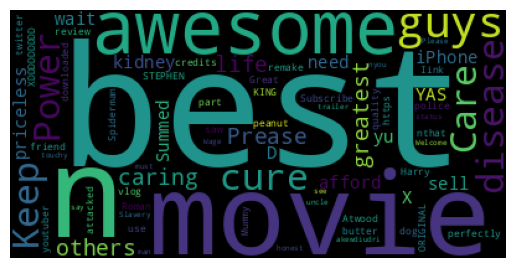

In [138]:
plt.imshow(wordcloud)
plt.axis('off')

Word Cloud for Negative comment

In [139]:
total_negative_comment = ' '.join(negative_comment_df['comment_text'])
total_negative_comment

"BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE HE EXPOSED HITLARY'S RITUAL ABUSE ON CHILDREN!!!!!!! Well… The brain surgeon Ben Carson just proved how truly insane he is… WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!"

In [140]:
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_negative_comment)

(-0.5, 399.5, 199.5, -0.5)

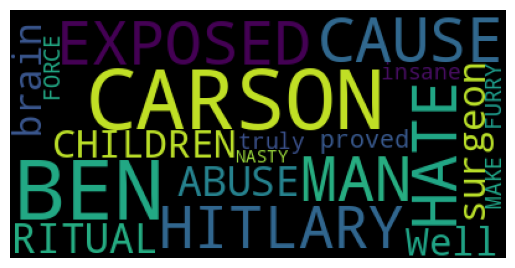

In [141]:
plt.imshow(wordcloud)
plt.axis('off')

# **Emoji Analysis**

In [142]:
emoji.__version__

'2.2.0'

In [143]:
sample_comment_df['comment_text'].head()

,comment_text
0,Logan Paul it's yo big day ‼️‼️‼️
1,I've been following you from the start of your...
2,Say hi to Kong and maverick for me
3,MY FAN . attendance
4,trending 😉


In [144]:
import emoji

comment = 'trending 😉'
emoji_list = []

# Loop through each character in the comment
for char in comment:
    # Check if the character is an emoji
    if char in emoji.EMOJI_DATA:
        emoji_list.append(char)  # Append the emoji to the list

# Print the list of emojis found in the comment
emoji_list

['😉']

In [145]:
# Alternate method using List Comprehension. This one-liner is a more concise way to achieve the same result as the earlier for loop!
comment = 'trending 😉'

# Using a list comprehension to find emojis in the comment
emoji_list = [char for char in comment if char in emoji.EMOJI_DATA]

# Explanation of the list comprehension:
# 1. Iterates through each character in the string `comment`.
# 2. Checks if the character `char` is present in `emoji.EMOJI_DATA`.
# 3. If true, includes the character in the resulting list `emoji_list`.

emoji_list

['😉']

In [146]:
# Initialize an empty list to store all emojis found
all_emoji_list = []

# Iterate through each comment in the DataFrame
for comment in sample_comment_df['comment_text']:
    # Iterate through each character in the current comment
    for char in comment:
        # Check if the character is an emoji
        if char in emoji.EMOJI_DATA:
            all_emoji_list.append(char)  # Append the emoji to the list

# Output the complete list of emojis found
print(all_emoji_list)

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋', '💙', '👍', '👈', '😂', '🔥', '😂', '😂', '😂', '😂', '👻', '❤', '😂', '❤', '💎', '😆', '😆', '😆', '😆', '😆', '😆', '😁', '😁', '😁', '😁', '😁', '😁', '😁', '😂', '😂', '😂', '😂', '😭', '😒', '👏', '👏', '👏', '👏', '👏', '👏', '👏', '👏', '👏', '👏', '😊', '❤', '👈', '😂', '😂', '👌', '👌', '🤔', '👈', '😂', '😂', '😁', '💔', '😂', '👎', '👎', '👎', '👎', '👎', '🍎', '😤', '😂', '😂', '😂', '😂', '👈', '😭', '😭', '😭', '😢', '😢', '😢', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '💋', '💋', '👫', '💘', '😻', '💋', '💋', '💖', '💖', '💖', '💖', '💖', '💖', '💖', '💖', '💖', '💖', '💖', '💖', '💖', '💖', '🌟', '🌟', '😮', '😮', '😮', '😮', '😮', '😮', '😮', '😮', '😮', '👈', '😊', '👇', '🏻', '😳', '😳', '❤', '👈', '😠', '😆', '😂', '😆',

In [147]:
all_emoji_list[0:10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

The Counter is a class in Python's collections module. It is a specialized dictionary subclass used for counting hashable objects. It counts the occurrences of elements in an iterable (like a list, tuple, or string) and stores them as dictionary keys, with their counts as the corresponding values.

In [148]:
Counter(all_emoji_list).most_common(10)

[('😂', 105),
 ('💖', 14),
 ('👏', 10),
 ('😆', 9),
 ('😮', 9),
 ('👈', 8),
 ('😁', 8),
 ('❤', 7),
 ('😍', 7),
 ('🤣', 6)]

In [149]:
Counter(all_emoji_list).most_common(10)[0]

('😂', 105)

In [150]:
Counter(all_emoji_list).most_common(10)[0][0]

'😂'

In [151]:
Counter(all_emoji_list).most_common(10)[0][1]

105

In [152]:
top_ten_emoji = [Counter(all_emoji_list).most_common(10)[i][0] for i in range(10)]
top_ten_emoji

['😂', '💖', '👏', '😆', '😮', '👈', '😁', '❤', '😍', '🤣']

In [153]:
top_ten_emoji_frequency = [Counter(all_emoji_list).most_common(10)[i][1] for i in range(10)]
top_ten_emoji_frequency

[105, 14, 10, 9, 9, 8, 8, 7, 7, 6]

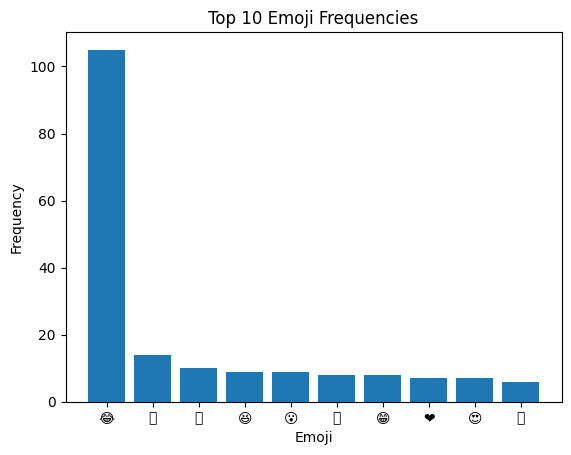

In [154]:
# Create the bar chart
plt.bar(top_ten_emoji, top_ten_emoji_frequency)

# Add labels and title
plt.xlabel("Emoji")
plt.ylabel("Frequency")
plt.title("Top 10 Emoji Frequencies")

# Display the chart
plt.show()

# **Retrieve all data**

In [155]:
# List all files and directories in the specified folder path
files = os.listdir('/content/drive/My Drive/portfolio_dataset/project_1/additional_data')

In [156]:
files

['CAvideos.csv',
 'CA_category_id.json',
 'DE_category_id.json',
 'DEvideos.csv',
 'FR_category_id.json',
 'FRvideos.csv',
 'GBvideos.csv',
 'GB_category_id.json',
 'IN_category_id.json',
 'INvideos.csv',
 'JPvideos.csv',
 'JP_category_id.json',
 'KRvideos.csv',
 'KR_category_id.json',
 'MX_category_id.json',
 'MXvideos.csv',
 'RU_category_id.json',
 'RUvideos.csv',
 'US_category_id.json',
 'USvideos.csv',
 'CAvideos.gsheet']

In [157]:
# Filter the list of files to include only those with '.csv' in their name
files_csv = [file for file in files if '.csv' in file]

In [158]:
files_csv

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv']

In [159]:
# Suppress all warnings to keep the output clean
filterwarnings('ignore')

In [160]:
# Initialize an empty DataFrame to hold the combined CSV data
combined_csv_df = pd.DataFrame()

# Define the path to the folder containing the CSV files
path = '/content/drive/My Drive/portfolio_dataset/project_1/additional_data'

# Iterate through the list of CSV files
for file in files_csv:
    # Read the current CSV file, handling encoding and skipping problematic lines
    current_df = pd.read_csv(path + '/' + file, encoding='iso-8859-1', on_bad_lines='skip')

    # Append the current DataFrame to the combined DataFrame
    combined_csv_df = pd.concat([combined_csv_df, current_df], ignore_index=True)


In [161]:
combined_csv_df.shape

(375942, 16)

# **Data Export Process**

In [162]:
combined_csv_df.shape

(375942, 16)

Explanation
- DataFrame.duplicated(): This method returns a boolean Series indicating whether each row is a duplicate or not, based on all columns by default. If True, it means that the row is a duplicate of a previous one.

In [163]:
# Identify duplicate rows in the DataFrame based on all columns
combined_csv_df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
375937,True
375938,False
375939,False
375940,False


In [164]:
combined_csv_df[combined_csv_df.duplicated()].shape

(36417, 16)

In [165]:
unique_combined_csv_df = combined_csv_df.drop_duplicates()

In [166]:
unique_combined_csv_df.shape

(339525, 16)

1. Why Save Data to a CSV File?
- Portability: CSV files are widely used and can be easily shared or opened in tools like Excel or Google Sheets.
Data Inspection: Useful for quickly reviewing the data in a simple, tabular format.
- Compatibility: CSV files are compatible with almost all data processing tools and programming languages.
2. Why Save Data to a JSON File?
- Structured Data: JSON is ideal for hierarchical or nested data that cannot be fully represented in a flat table format.
- Web and APIs: JSON is the preferred data format for web applications and APIs.
- Lightweight Storage: Useful for storing and transferring data as text, especially when structure is important.
3. Why Save Data to a SQLite Database?
- Database Operations: Saving data to SQLite allows you to perform SQL queries, joins, and other database operations efficiently.
- Scalability: Ideal for working with larger datasets that are too big for in-memory operations (like Pandas).
- Data Persistence: SQLite databases ensure data integrity and provide a convenient way to store data for future use in a compact, portable format.
Interoperability: Enables seamless integration with applications requiring database connectivity.

In [167]:
# Save the first 1000 rows of the DataFrame 'unique_combined_csv_df' to a CSV file
# Set 'index=False' to exclude the index column from the output CSV file
unique_combined_csv_df[0:1000].to_csv('/content/drive/My Drive/portfolio_dataset/project_1/sample_combined.csv', index = False)

In [168]:
# Save the first 1000 rows of the DataFrame 'unique_combined_csv_df' to a JSON file
unique_combined_csv_df[0:1000].to_json('/content/drive/My Drive/portfolio_dataset/project_1/sample_combined.json')

In [169]:
# Create a SQLAlchemy engine for a SQLite database
# This engine will allow interaction with the SQLite database located at the specified path
engine = create_engine('sqlite:////content/drive/My Drive/portfolio_dataset/project_1/sample_combined.sqllite')

In [170]:
# Save the first 1000 rows of the DataFrame 'unique_combined_csv_df' to a table named 'Users' in the SQLite database
# 'con=engine' specifies the database connection created by the SQLAlchemy engine
# 'if_exists="append"' ensures that the data is added to the table if it already exists, without overwriting existing data
unique_combined_csv_df[0:1000].to_sql('Users', con = engine, if_exists='append')

1000

# **Favorite Category Analysis**

In [171]:
unique_combined_csv_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...


The category_id column exists but currently has no associated values, so we will retrieve the corresponding data to populate it.

In [172]:
unique_combined_csv_df['category_id'].unique()

array([10, 23, 24, 25, 22, 26,  1, 28, 20, 17, 29, 15, 19,  2, 27, 43, 30,
       44])

In [173]:
us_json_df = pd.read_json('/content/drive/My Drive/portfolio_dataset/project_1/additional_data/US_category_id.json')

In [174]:
us_json_df

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
5,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
6,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
7,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
8,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
9,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [175]:
us_json_df['items']

,items
0,"{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,"{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,"{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,"{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,"{'kind': 'youtube#videoCategory', 'etag': '""m2..."
5,"{'kind': 'youtube#videoCategory', 'etag': '""m2..."
6,"{'kind': 'youtube#videoCategory', 'etag': '""m2..."
7,"{'kind': 'youtube#videoCategory', 'etag': '""m2..."
8,"{'kind': 'youtube#videoCategory', 'etag': '""m2..."
9,"{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [176]:
us_json_df['items'][0]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [177]:
us_json_df['items'][1]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
 'id': '2',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Autos & Vehicles',
  'assignable': True}}

In [178]:
cat_dict = {}
# Iterating through the 'values' of the 'items' key in the us_json_df dictionary.
# Populating 'cat_dict' by converting the 'id' to an integer and mapping it to the corresponding 'title'
# from the 'snippet'. This creates a dictionary of category IDs and their respective titles.
for item in us_json_df['items'].values:
    cat_dict[int(item['id'])] = item['snippet']['title']

In [179]:
cat_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [180]:
# Adding a new column 'category_name' to the DataFrame by mapping 'category_id' to its corresponding name
# using the 'cat_dict' dictionary created earlier. This allows for a more descriptive representation of categories.
unique_combined_csv_df['category_name'] = unique_combined_csv_df['category_id'].map(cat_dict)

In [181]:
unique_combined_csv_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,Music


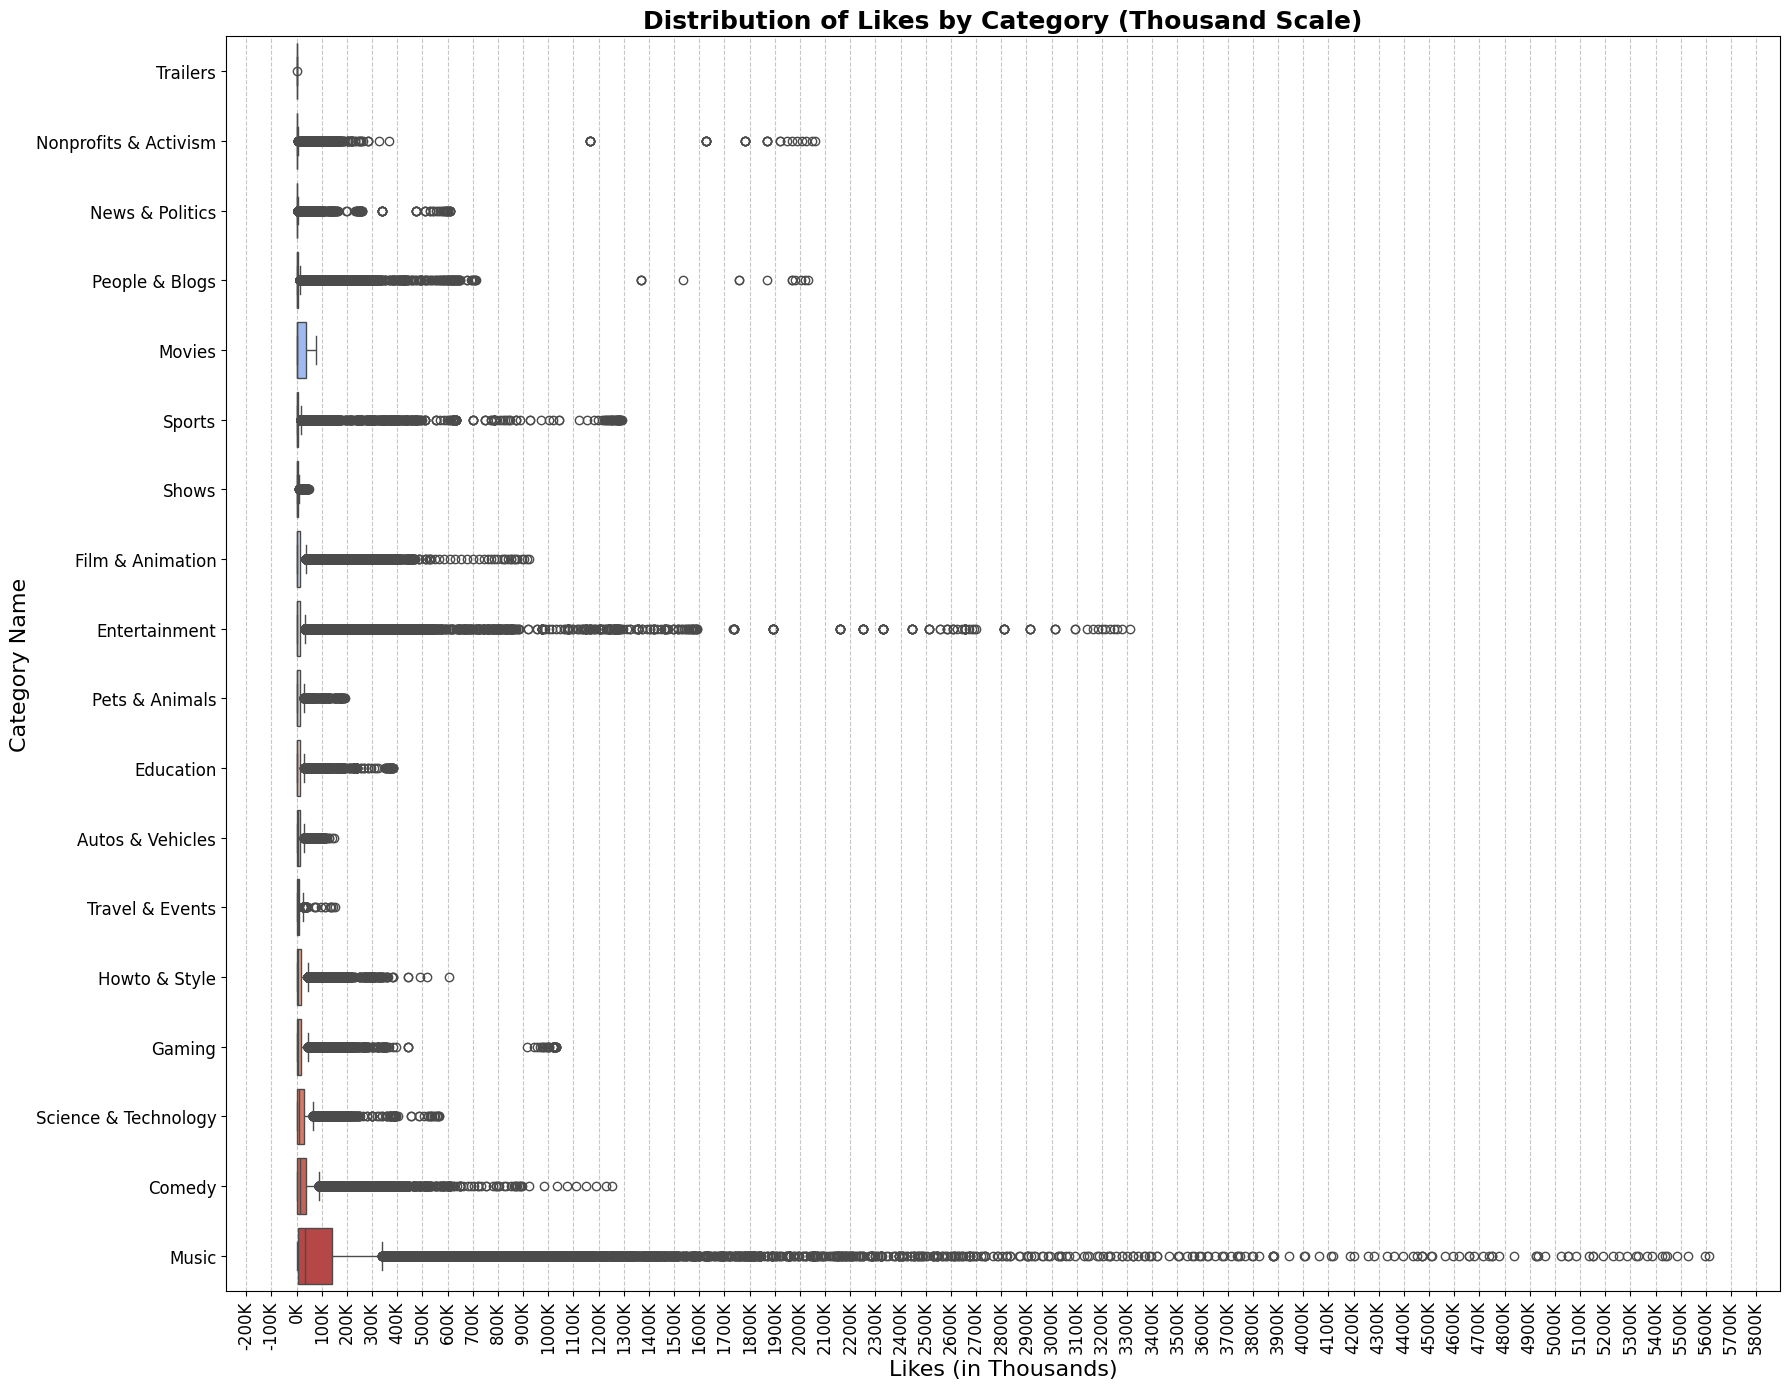

In [182]:
import matplotlib.ticker as ticker

# Sort categories by median likes
sorted_categories = unique_combined_csv_df.groupby('category_name')['likes'].median().sort_values().index

# Create the box plot with enhancements
plt.figure(figsize=(18, 14))
sns.boxplot(
    x='likes',
    y='category_name',
    data=unique_combined_csv_df,
    order=sorted_categories,
    palette='coolwarm',  # Updated to a visually distinct color palette
    showfliers=True      # Show outliers to spot data extremes
)

# Set the x-axis to a thousand scale
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e3:.0f}K'))
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(100000))  # Set ticks at 100,000 intervals (100K)

# Add gridlines for readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add labels and title
plt.title('Distribution of Likes by Category (Thousand Scale)', fontsize=18, fontweight='bold')
plt.xlabel('Likes (in Thousands)', fontsize=16)
plt.ylabel('Category Name', fontsize=16)

# Add annotations for better readability
plt.xticks(fontsize=12)
plt.xticks(rotation='vertical')
plt.yticks(fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


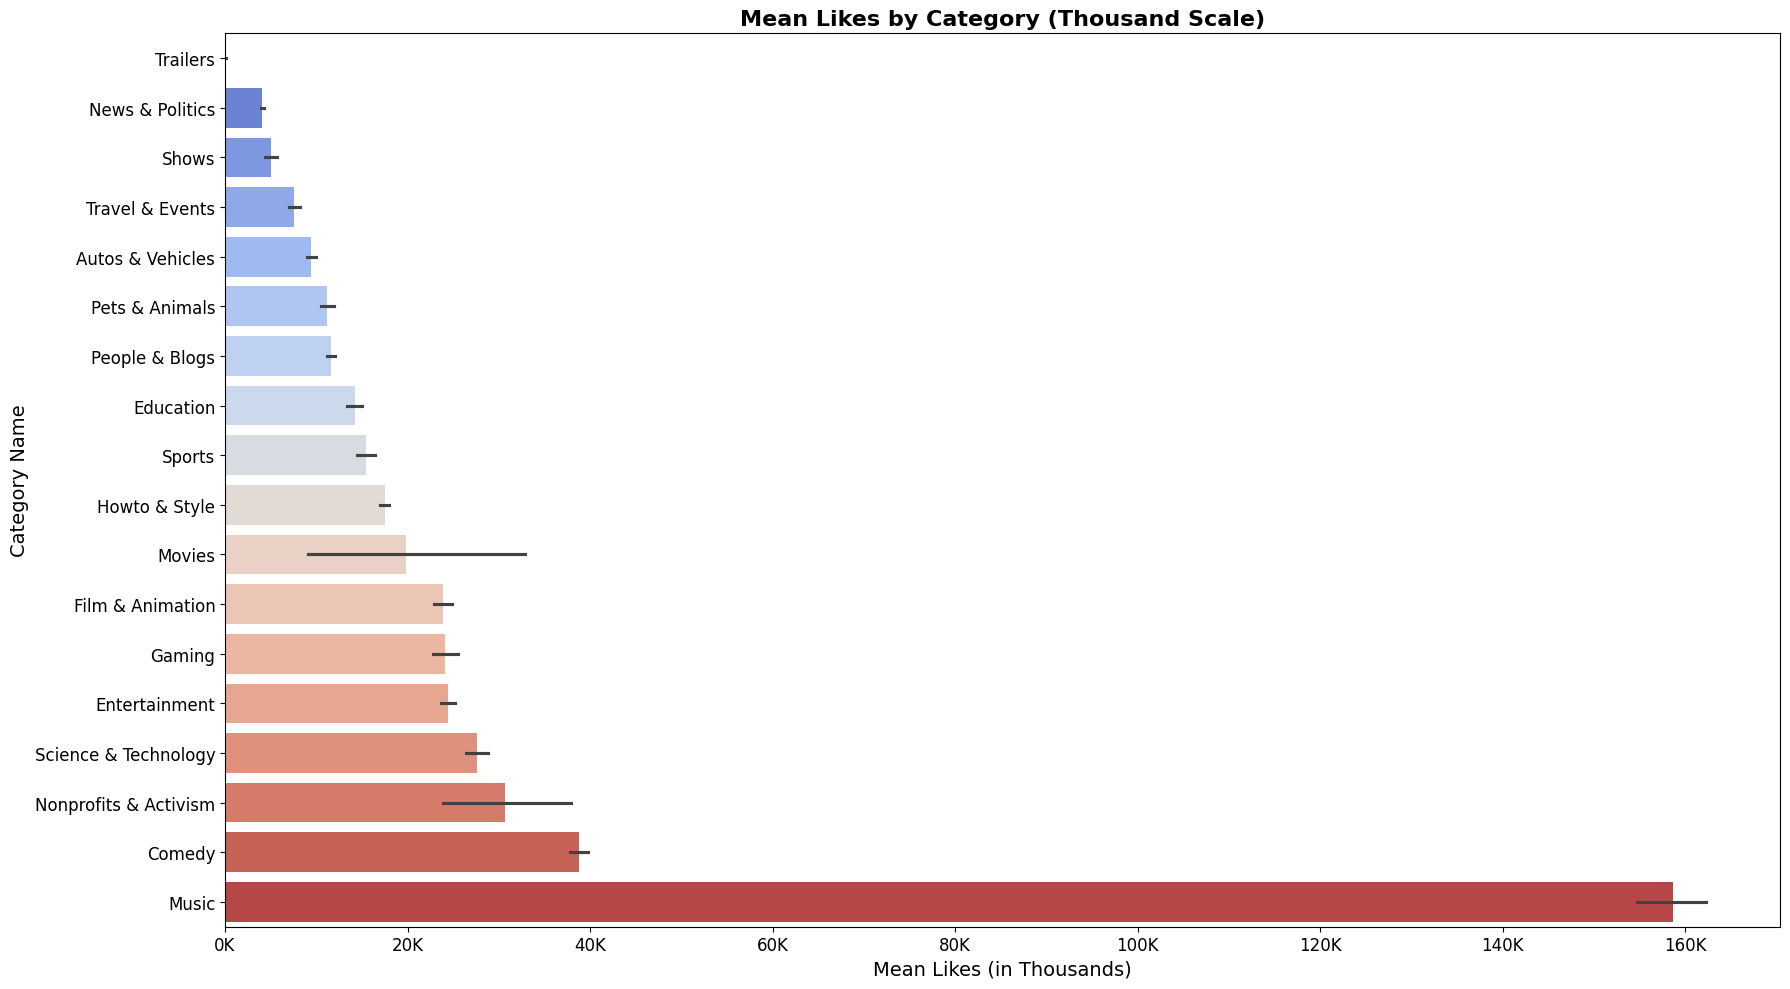

In [183]:
# Sort categories by mean likes for consistent ordering
sorted_categories = unique_combined_csv_df.groupby('category_name')['likes'].mean().sort_values().index

# Plot 1: Bar plot for mean likes by category
plt.figure(figsize=(18, 10))
sns.barplot(
    x='likes',
    y='category_name',
    data=unique_combined_csv_df,
    order=sorted_categories,
    palette='coolwarm',
    estimator='mean'  # Calculate mean likes
)
# Format the x-axis to show values in thousands (K)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e3:.0f}K'))
plt.title('Mean Likes by Category (Thousand Scale)', fontsize=16, fontweight='bold')
plt.xlabel('Mean Likes (in Thousands)', fontsize=14)
plt.ylabel('Category Name', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

1. Top Performing Categories:

- Music: This category has the highest mean likes (approximately 150K), significantly outshining all other categories.
- Comedy: The second highest, with mean likes around 60K, but far below Music.
2. Moderately Performing Categories:

- Categories such as Entertainment, Science & Technology, and Nonprofits &  Activism exhibit mean likes in the 20K–40K range.
3. Low Performing Categories:

- Categories like Trailers, News & Politics, Shows, and Travel & Events have the lowest mean likes, often below 10K.
4. Variability:

- Categories like Movies and Nonprofits & Activism show large error bars, indicating significant variability in the data (some videos may have very high or low likes compared to the mean).
- Categories like Music and Comedy have smaller error bars, suggesting more consistent performance across videos.

# **Audience Engagement Analysis**

In [184]:
# Calculate the like rate as a percentage of likes to views for each row in the dataframe
unique_combined_csv_df['like_rate'] = (unique_combined_csv_df['likes'] / unique_combined_csv_df['views']) * 100

# Calculate the dislike rate as a percentage of dislikes to views for each row in the dataframe
unique_combined_csv_df['dislike_rate'] = (unique_combined_csv_df['dislikes'] / unique_combined_csv_df['views']) * 100

# Calculate the comment count rate as a percentage of comments to views for each row in the dataframe
unique_combined_csv_df['comment_count_rate'] = (unique_combined_csv_df['comment_count'] / unique_combined_csv_df['views']) * 100

In [185]:
unique_combined_csv_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,like_rate,dislike_rate,comment_count_rate
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music,4.589104,0.253051,0.733639
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy,12.594873,0.166363,1.284185
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy,4.575843,0.167292,0.256342
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment,6.309630,0.094903,0.835851
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,Music,4.874563,0.062887,0.253752


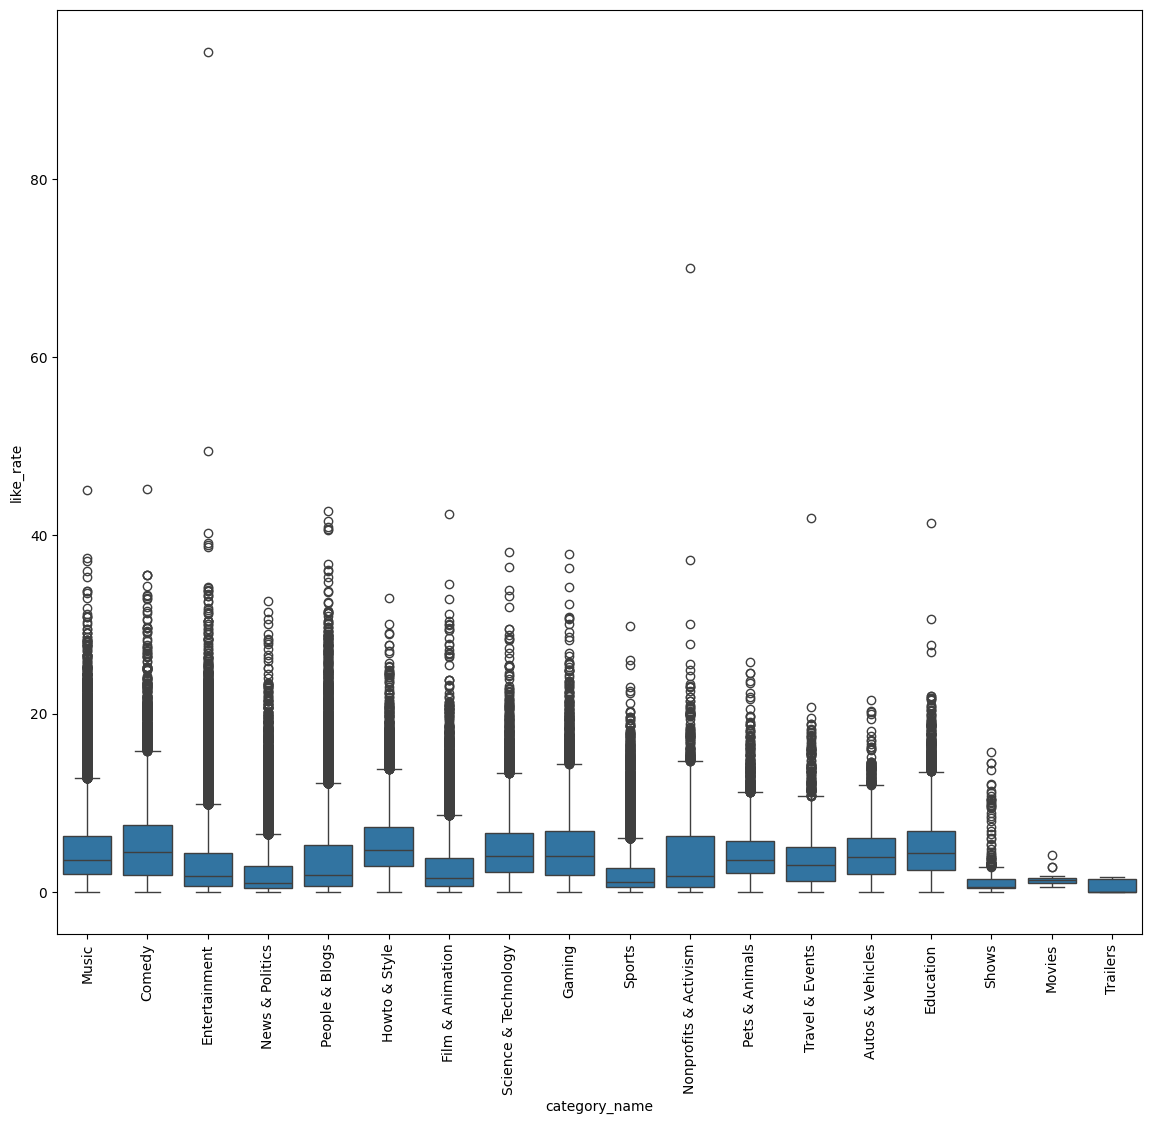

In [186]:
plt.figure(figsize=(14,12))
sns.boxplot(x='category_name', y='like_rate', data=unique_combined_csv_df)
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='views', ylabel='likes'>

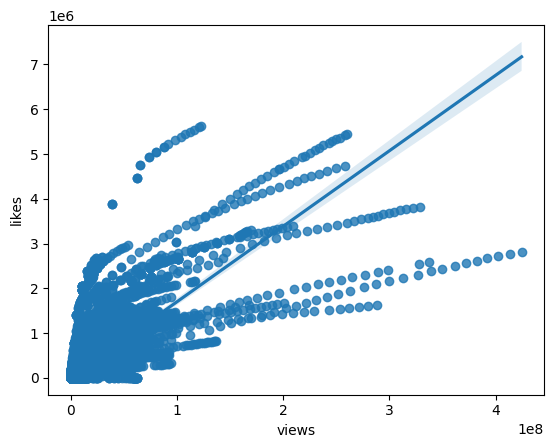

In [187]:
sns.regplot(x='views', y='likes', data=unique_combined_csv_df )

In [188]:
unique_combined_csv_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name', 'like_rate',
       'dislike_rate', 'comment_count_rate'],
      dtype='object')

In [189]:
unique_combined_csv_df[['views', 'likes', 'dislikes']].corr()

,views,likes,dislikes
views,1.000000,0.779531,0.405428
likes,0.779531,1.000000,0.451809
dislikes,0.405428,0.451809,1.000000


<Axes: >

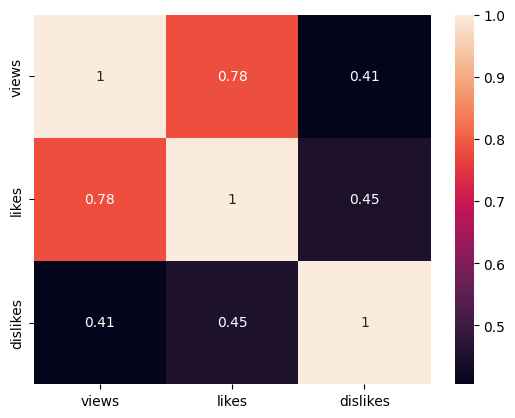

In [190]:
sns.heatmap(unique_combined_csv_df[['views', 'likes', 'dislikes']].corr(), annot=True)

# **Trend Analysis**

In [191]:
unique_combined_csv_df.value_counts()

video_id     trending_date  title                                                                               channel_title                      category_id  publish_time              tags                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              views   likes  dislikes  comment_count  thumbnail_link                                  comments_disabled  ratings_disabled  video_error_or_removed  description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             category_name    like_rate  dislike_rate  comment_count_rate
#NAME?       17.01.12       Har Mard Ka Dard -3                                           

In [192]:
grouped_channel_df = unique_combined_csv_df.groupby(['channel_title']).size().sort_values(ascending=False).reset_index()
grouped_channel_df

,channel_title,0
0,The Late Show with Stephen Colbert,710
1,WWE,643
2,Late Night with Seth Meyers,592
3,TheEllenShow,555
4,Jimmy Kimmel Live,528
...,...,...
37819,Kd Malts,1
37820,Zedan TV,1
37821,Kc Kelly - Rocketprenuer,1
37822,Kbaby,1


In [193]:
grouped_channel_df = grouped_channel_df.rename(columns={0:'total_videos'})
grouped_channel_df

,channel_title,total_videos
0,The Late Show with Stephen Colbert,710
1,WWE,643
2,Late Night with Seth Meyers,592
3,TheEllenShow,555
4,Jimmy Kimmel Live,528
...,...,...
37819,Kd Malts,1
37820,Zedan TV,1
37821,Kc Kelly - Rocketprenuer,1
37822,Kbaby,1


In [194]:
px.bar(grouped_channel_df[0:20], x='channel_title', y='total_videos')

# **Punctuations Influence Analysis**

In [195]:
unique_combined_csv_df['title'][0]

'Eminem - Walk On Water (Audio) ft. BeyoncÃ©'

In [196]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [197]:
[char for char in unique_combined_csv_df['title'][0] if char in string.punctuation]

['-', '(', ')', '.']

In [198]:
len([char for char in unique_combined_csv_df['title'][0] if char in string.punctuation])

4

In [199]:
def punc_count(text):
    # This function counts the number of punctuation characters in the given text.
    # It uses a list comprehension to iterate over each character in the text and checks if it is in the string.punctuation set.
    # Finally, it returns the length of the list of punctuation characters.
    return len([char for char in text if char in string.punctuation])

In [203]:
unique_combined_csv_df['punc_count'] = unique_combined_csv_df['title'].apply(punc_count)

In [201]:
unique_combined_csv_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,like_rate,dislike_rate,comment_count_rate
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music,4.589104,0.253051,0.733639
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy,12.594873,0.166363,1.284185
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy,4.575843,0.167292,0.256342
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment,6.309630,0.094903,0.835851
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,Music,4.874563,0.062887,0.253752


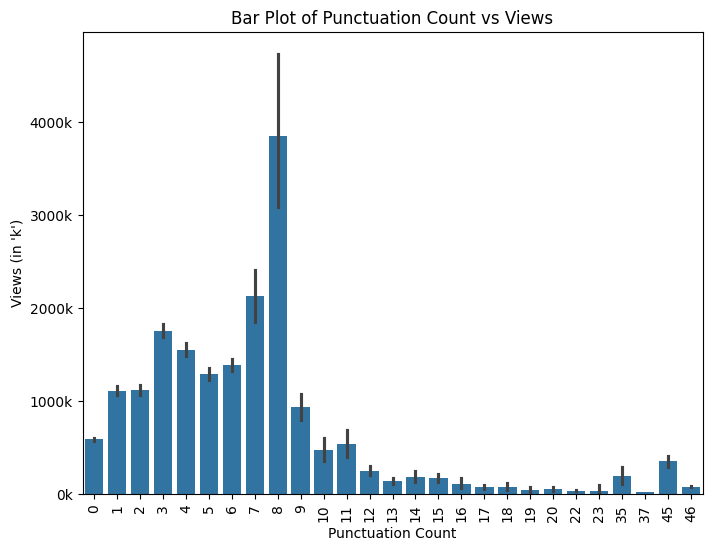

In [209]:
plt.figure(figsize=(8, 6))
sns.barplot(x='punc_count', y='views', data=unique_combined_csv_df)

# Define a formatter function for 'k' scale
def thousands_formatter(x, pos):
    return f'{int(x / 1000)}k'

# Apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

plt.xticks(rotation='vertical')
plt.title("Bar Plot of Punctuation Count vs Views")
plt.xlabel("Punctuation Count")
plt.ylabel("Views (in 'k')")
plt.show()